In [26]:
import numpy as np
import dicom
import sys
import os
import scipy.ndimage
import pandas as pd
import matplotlib.pyplot as plt

from skimage import measure, morphology
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

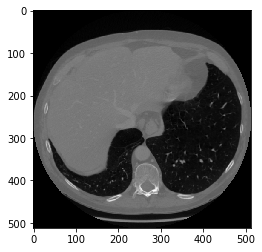

In [52]:
path = './Desktop/data'
lstFileDicom = []
for dirName, subdirList, fileList in os.walk(path):
    for filename in fileList:
        if ".dcm" in filename.lower():
            lstFileDicom.append(os.path.join(dirName, filename))

#ref filename
RefDs = dicom.read_file(lstFileDicom[0])
slice = RefDs.pixel_array
slice[slice == -2000] = 0
plt.imshow(slice, cmap=plt.cm.gray)
plt.show()

In [53]:
pixelDims = (int(RefDs.Rows), int(RefDs.Columns), len(lstFileDicom))
print pixelDims

(512, 512, 342)


In [54]:
pixelSpacing = (float(RefDs.PixelSpacing[0]), float(RefDs.PixelSpacing[1]), float(RefDs.SliceThickness))
print pixelSpacing

(0.703125, 0.703125, 0.625)


In [55]:
x = np.arange(0.0, (pixelDims[0]+1)*pixelSpacing[0], pixelSpacing[0])
y = np.arange(0.0, (pixelDims[1]+1)*pixelSpacing[1], pixelSpacing[1])
z = np.arange(0.0, (pixelDims[2]+1)*pixelSpacing[2], pixelSpacing[2])


Calculated the total dimensions of the 3D NumPy array which are equal to (Number of pixel rows in a slice) x (Number of pixel columns in a slice) x (Number of slices) along the x, y, and z cartesian axes. This value is stored in PixelDims variable

PixelSpacing and SliceThickness attributes are used to calculate the spacing between pixels in the three axes, then stored in the variable pixelSpacing

numpy.arrange is used for calculating the axes of the array.

In [56]:
ArrayDicom = np.zeros(pixelDims, dtype = RefDs.pixel_array.dtype)
print RefDs.pixel_array


[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]


In [57]:
for fileDCM in lstFileDicom:
    df = dicom.read_file(fileDCM)
    ArrayDicom[:, :, lstFileDicom.index(fileDCM)] = df.pixel_array 
#return ArrayDicom    

Created an array arrayDicom with specified dimensions of pixelDims and datatype of reference dataset. (The dtype of this array is the same as the dtype of the pixel_array of the reference-dataset RefDs which we originally used to extract metadata).

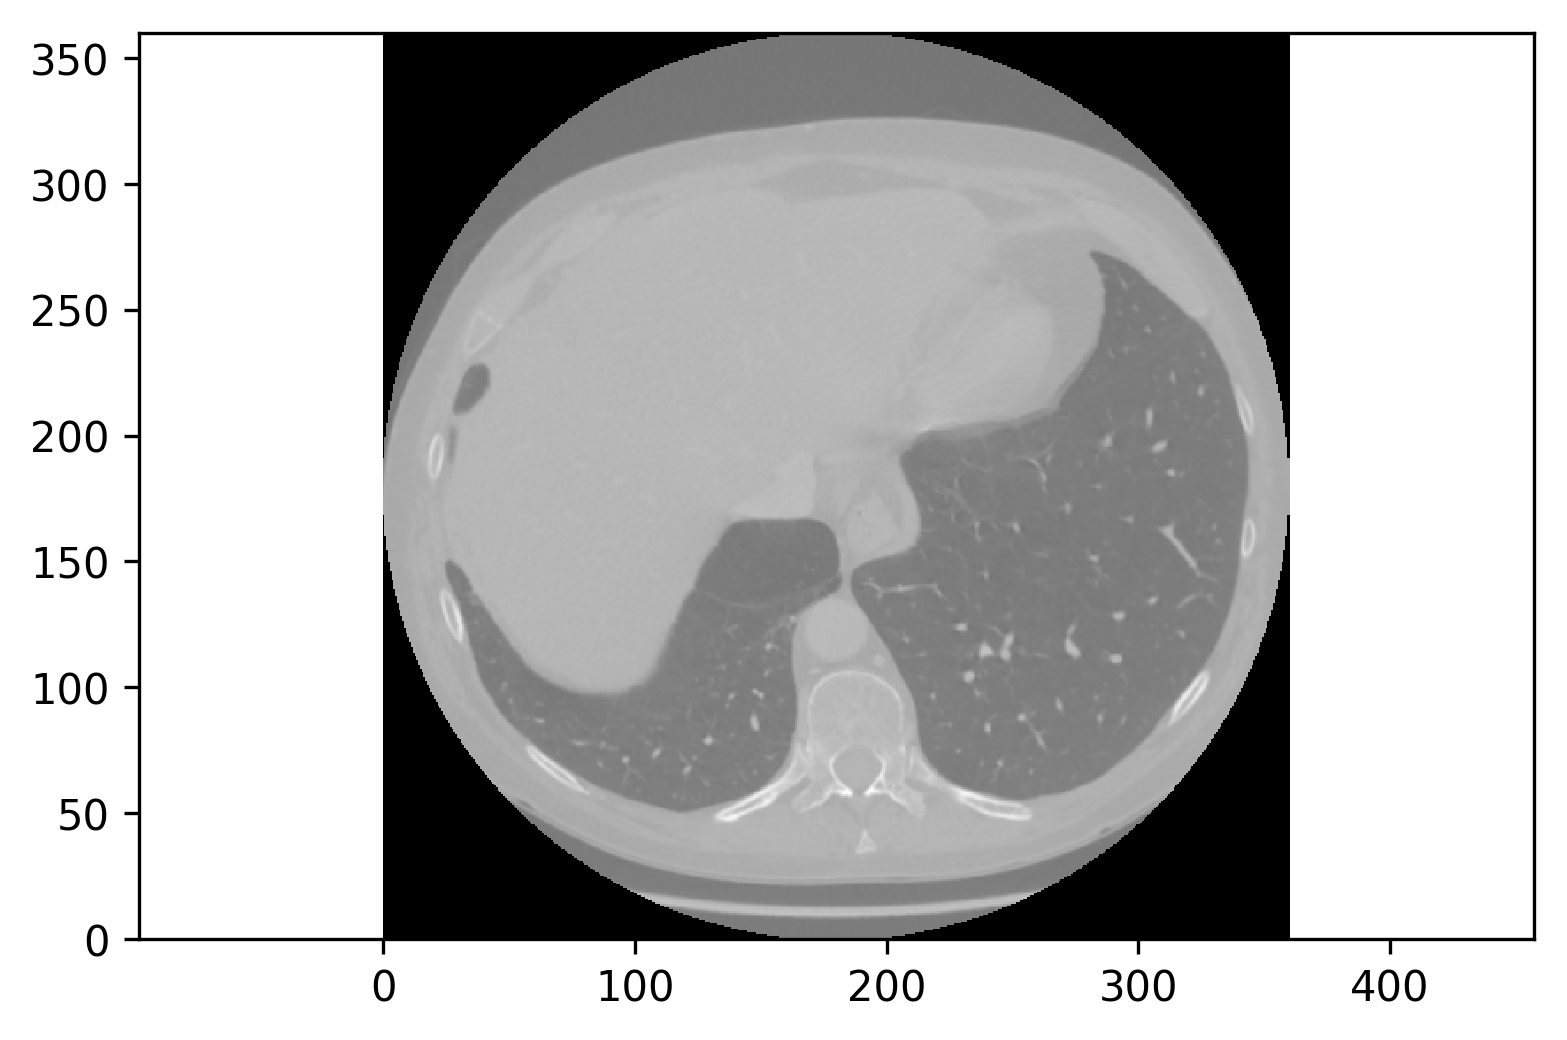

In [58]:
plt.figure(dpi=300)
plt.axes().set_aspect('equal', 'datalim')
plt.set_cmap(plt.gray())
plt.pcolormesh(x, y, np.flipud(ArrayDicom[:, :, 120]))
plt.show()

In [46]:

def load_scan(path):
    slices = [dicom.read_file(path + '' + s) for s in os.listdir(path)]
    slices.sort(key = lambda x: float(x.ImagePositionPatient[2]))
    try:
        slice_thickness = np.abs(slices[0].ImagePositionPatient[2] - slices[1].ImagePositionPatient[2])
    except:
        slice_thickness = np.abs(slices[0].SliceLocation - slices[1].SliceLocation)
        
    for s in slices:
        s.SliceThickness = slice_thickness
        
    return slices
    print slices

In [47]:
def get_pixels_hu(slices):
    image = np.stack([s.pixel_array for s in slices])
    image = image.astype(np.int16)
    image[image == -2000] = 0
    for slice_number in range(len(slices)):
        intercept = slices[slice_number].RescaleIntercept
        slope = slices[slice_number].RescaleSlope
        if slope != 1:
            image[slice_number] = slope * image[slice_number].astype(np.float64)
            image[slice_number] = image[slice_number].astype(np.int16)
            
        image[slice_number] += np.int16(intecept)
        
    return np.array(image, dtype = np.int16)    

AttributeError: 'numpy.ndarray' object has no attribute 'pixel_array'